## NYC KPI DA

LIST OF KPIs
* vehicle hours reduction ($\Delta T_v$)
* travellers utility gains ($\Delta U_p$)
* share of pooling (shared ratio, $S$)
* occupancy ($O$)
* passenger hours increase (pooling detour, $\Delta T_p$)

In [11]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

plt.style.use(['science','no-latex'])

In [12]:
df = pd.read_csv('KPI_resultsNYC.csv', index_col=0)

In [14]:
df.to_csv('KPI_resultsNYC.csv')
df.Start_time = df.apply(lambda row: pd.Timestamp(row.Start_time), axis=1) #convert "Start_time" to time type

In [15]:
df.Start_time = pd.to_datetime(df.Start_time)
df.End_time = pd.to_datetime(df.End_time)

In [16]:
df['del_VehHourTrav']=(df['VehHourTrav_ns']-df['VehHourTrav'])/df['VehHourTrav']

In [17]:
df['del_PassHourTrav']=abs((df['PassHourTrav_ns']-df['PassHourTrav'])/df['PassHourTrav'])

In [18]:
df['del_PassUtility']=abs((df['PassUtility_ns']-df['PassUtility'])/df['PassUtility'])

In [19]:
df['Occupancy']=df['PassHourTrav']/df['VehHourTrav']

In [20]:
df.Start_time = df.apply(lambda row: pd.Timestamp(row.Start_time), axis=1)

Text(0, 0.5, '$\\Delta T_p$')

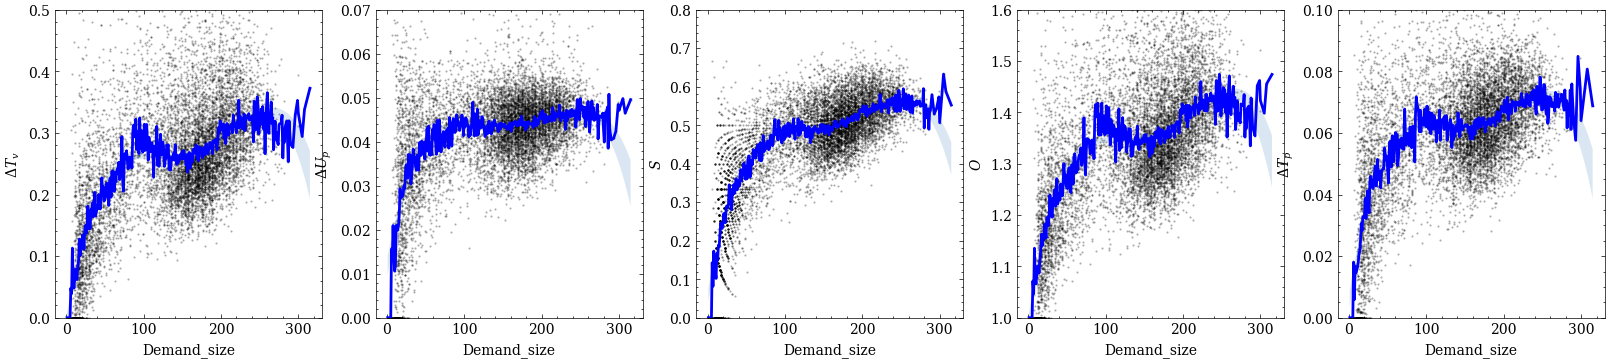

In [28]:
fig, axes = plt.subplots(1,5, figsize = (20,4))
axes = axes.flatten()

ax=axes[0]
to_plot = df[(df.Start_time.dt.dayofweek.isin([0,1,2,3,4,5,6]))]
sns.regplot(data = to_plot, x = 'Demand_size', y = 'del_VehHourTrav', 
            scatter_kws = {'s':0.3, 'alpha':0.3, 'color':'black'}, order = 4, ax = ax, 
            line_kws = {'lw':0})
to_plot = df[(df.Start_time.dt.dayofweek.isin([0,1,2,3,4,5,6]))].groupby(df.Demand_size).del_VehHourTrav.mean()
to_plot.plot(ax = ax, lw = 2, color = 'blue')
ax.set_ylim((0,0.5))
ax.set_ylabel("$\Delta T_v$")

ax=axes[1]
to_plot = df[(df.Start_time.dt.dayofweek.isin([0,1,2,3,4,5,6]))]
sns.regplot(data = to_plot, x = 'Demand_size', y = 'del_PassUtility', 
            scatter_kws = {'s':0.3, 'alpha':0.3, 'color':'black'}, order = 4, ax = ax, 
            line_kws = {'lw':0})
to_plot = df[(df.Start_time.dt.dayofweek.isin([0,1,2,3,4,5,6]))].groupby(df.Demand_size).del_PassUtility.mean()
to_plot.plot(ax = ax, lw = 2, color = 'blue')
ax.set_ylim((0,0.07))
ax.set_ylabel("$\Delta U_p$")

ax=axes[2]
to_plot = df[(df.Start_time.dt.dayofweek.isin([0,1,2,3,4,5,6]))]
sns.regplot(data = to_plot, x = 'Demand_size', y = 'shared_ratio', 
            scatter_kws = {'s':0.3, 'alpha':0.3, 'color':'black'}, order = 4, ax = ax, 
            line_kws = {'lw':0})
to_plot = df[(df.Start_time.dt.dayofweek.isin([0,1,2,3,4,5,6]))].groupby(df.Demand_size).shared_ratio.mean()
to_plot.plot(ax = ax, lw = 2, color = 'blue')
ax.set_ylim((0,0.8))
ax.set_ylabel("$S$")

ax=axes[3]
to_plot = df[(df.Start_time.dt.dayofweek.isin([0,1,2,3,4,5,6]))]#.groupby(df.Demand_size).Occupancy.mean()
sns.regplot(data = to_plot, x = 'Demand_size', y = 'Occupancy', 
            scatter_kws = {'s':0.3, 'alpha':0.3, 'color':'black'}, order = 4, ax = ax, 
            line_kws = {'lw':0})
to_plot = df[(df.Start_time.dt.dayofweek.isin([0,1,2,3,4,5,6]))].groupby(df.Demand_size).Occupancy.mean()
to_plot.plot(ax = ax, lw = 2, color = 'blue')
ax.set_ylim((1,1.6))
ax.set_ylabel("$O$")

ax=axes[4]
to_plot = df[(df.Start_time.dt.dayofweek.isin([0,1,2,3,4,5,6]))]
sns.regplot(data = to_plot, x = 'Demand_size', y = 'del_PassHourTrav', 
            scatter_kws = {'s':0.3, 'alpha':0.3, 'color':'black'}, order = 4, ax = ax, 
            line_kws = {'lw':0})
to_plot = df[(df.Start_time.dt.dayofweek.isin([0,1,2,3,4,5,6]))].groupby(df.Demand_size).del_PassHourTrav.mean()
to_plot.plot(ax = ax, lw = 2, color = 'blue')
ax.set_ylim((0,0.1))
ax.set_ylabel("$\Delta T_p$")
ax.set_ylabel("$\Delta T_p$")